Задание 1

In [2]:
import numpy as np
import operator
from numpy.linalg import norm
from numpy.linalg import inv
from numpy.linalg import det
import math
from functools import reduce
import pandas as pd
# %matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('seaborn-whitegrid')

In [3]:
def get_H(n, precision):
    # функция строит матрицу Гильберта размером n x n и округляет значения до precision знаков после запятой
    a = lambda i, j: round(1 / (i + j + 1), precision)
    return np.array([[a(i, j) for j in range(n)] for i in range(n)])

# проверим, что матрица Гильберта строится верно
get_H(3, 3)

array([[1.   , 0.5  , 0.333],
       [0.5  , 0.333, 0.25 ],
       [0.333, 0.25 , 0.2  ]])

In [4]:
P_1 = np.array([[-400.6, 199.8],[1198.8, -600.4]]) # 1 вариант из Пакулиной
P_2 = np.array([[-401., 200.],[1200., -601.]]) # 11 вариант из Пакулиной
print(P_1, P_2, sep="\n")

[[-400.6  199.8]
 [1198.8 -600.4]]
[[-401.  200.]
 [1200. -601.]]


In [5]:
T = np.array([[4, 1, 0, 0], [3, 7, -1, 0], [0, 2, 10, 1], [0, 0, 1, -2]]) # трёхдиагональная матрица со строгим диагональным преобладанием
T

array([[ 4,  1,  0,  0],
       [ 3,  7, -1,  0],
       [ 0,  2, 10,  1],
       [ 0,  0,  1, -2]])

In [6]:
cond_s = lambda A: norm(A) * norm(inv(A)) # norm - норма Фробениуса
    # Спектральный критерий

def cond_v(A):
    # Объемный критерий
    N = len(A)
    sqrt_sums = [math.sqrt(sum([A[n][m] ** 2 for m in range(N)])) for n in range(N)] # считаем для каждого n корень от суммы квадратов
    num = reduce(operator.mul, sqrt_sums, 1) # перемножаем
    den = abs(det(A))
    return num / den

def cond_a(A):
    # Угловой критерий
    N = len(A)
    C = inv(A)
    return max([norm(A[n,:]) * norm(C[:,n]) for n in range(N)])

print(cond_s(get_H(3, 3)))
print(cond_v(get_H(3, 3)))
print(cond_a(get_H(3, 3)))

575.0165322658206
827.0641468345667
189.1785652576386


In [7]:
class Plotter:
    # Класс для упрощения рисования графиков
    def __init__(self):
        self.xlabel = ""
        self.ylabel = ""
        self.xlog = False
        self.ylog = False
        

    def plot(self, df):
        self.fig = plt.figure(figsize=(15, 10), dpi=80)
        self.ax = plt.axes()

        if self.ylog:
            self.ax.set_yscale('log')
        if self.xlog:
            self.ax.set_xscale('log')
        self.ax.set_ylabel(self.ylabel, fontsize=20)
        self.ax.set_xlabel(self.xlabel, fontsize=20)

        self.ax.plot(df['x'], df['cond_s'], label='Спектральный критерий')
        self.ax.plot(df['x'], df['cond_v'], label='Объемный критерий')
        self.ax.plot(df['x'], df['cond_a'], label='Угловой критерий')
        self.ax.plot(df['x'], df['error'],  label='Погрешность', linewidth=6)
        self.ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})

plotter = Plotter()

In [8]:
def add_noise(A, order):
    # функция, добавляющая шум из равномерного распределения в матрицу
    return A + np.random.uniform( -order, order, A.shape)

Возьмём матрицу Гильберта порядка 6 с округлением до пятого знака после запятой. Будем постепенно увеличивать порядок шума, чем будем вносить всё большую погрешность

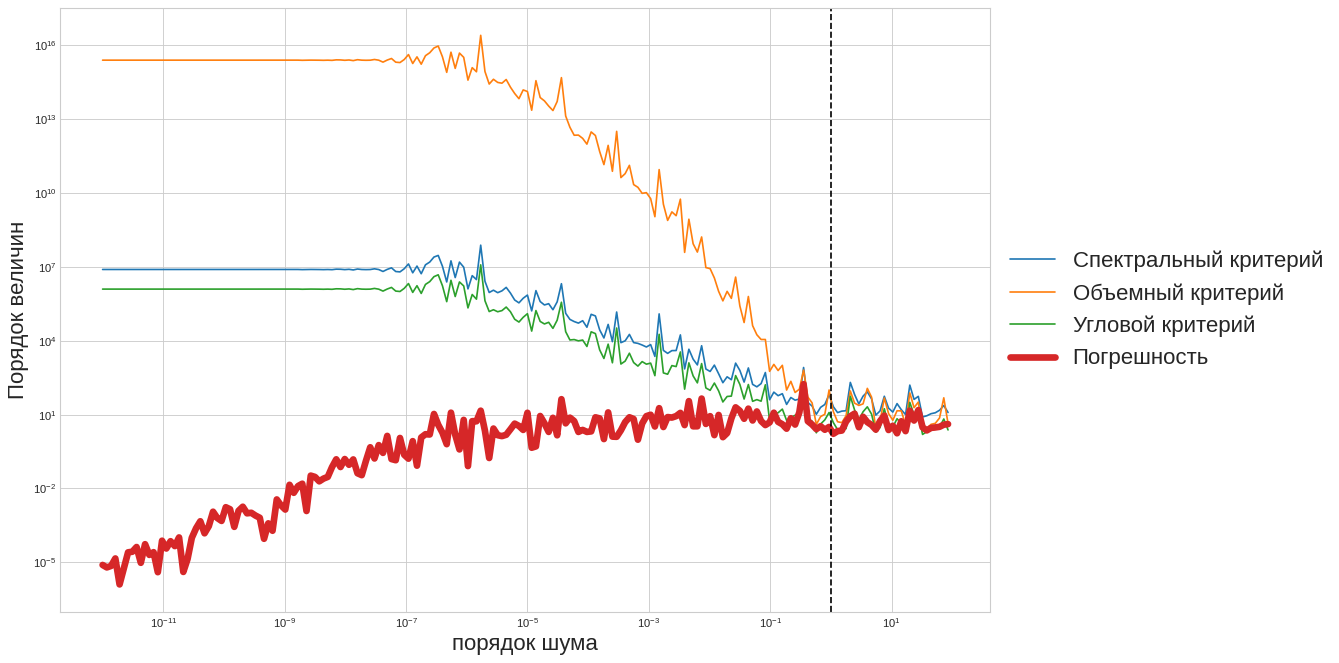

In [9]:
n = 6
x_0 = np.ones(n)
H = get_H(n, 5)
b = H @ x_0
data = []
xs = np.logspace(-12, 2, 200, endpoint=False)

for order in xs:
    new_H = add_noise(H, order)
    new_b = np.array([add_noise(coord, order) for coord in b])
    new_x = np.linalg.solve(new_H, new_b)
    data.append((cond_s(new_H), cond_v(new_H), cond_a(new_H), norm(x_0 - new_x)))

plotter.ylog = True
plotter.xlog = True
plotter.xlabel = 'порядок шума'
plotter.ylabel = 'Порядок величин'
df = pd.DataFrame(data, columns=['cond_s', 'cond_v', 'cond_a', 'error'])
df['x'] = xs
plotter.plot(df)
plotter.ax.axvline(x=1, linestyle='dashed', color ='#000000')
pass

Можно заметить, что до какого-то момента числа обусловленности практически не изменяются, при этом растет погрешность. В какой-то момент с увеличением порядка шума числа обусловленности убывают и становятся сравнимыми с погрешностью

Теперь рассмотрим матрицу из методички Пакулиной, для неё верны те же наблюдения

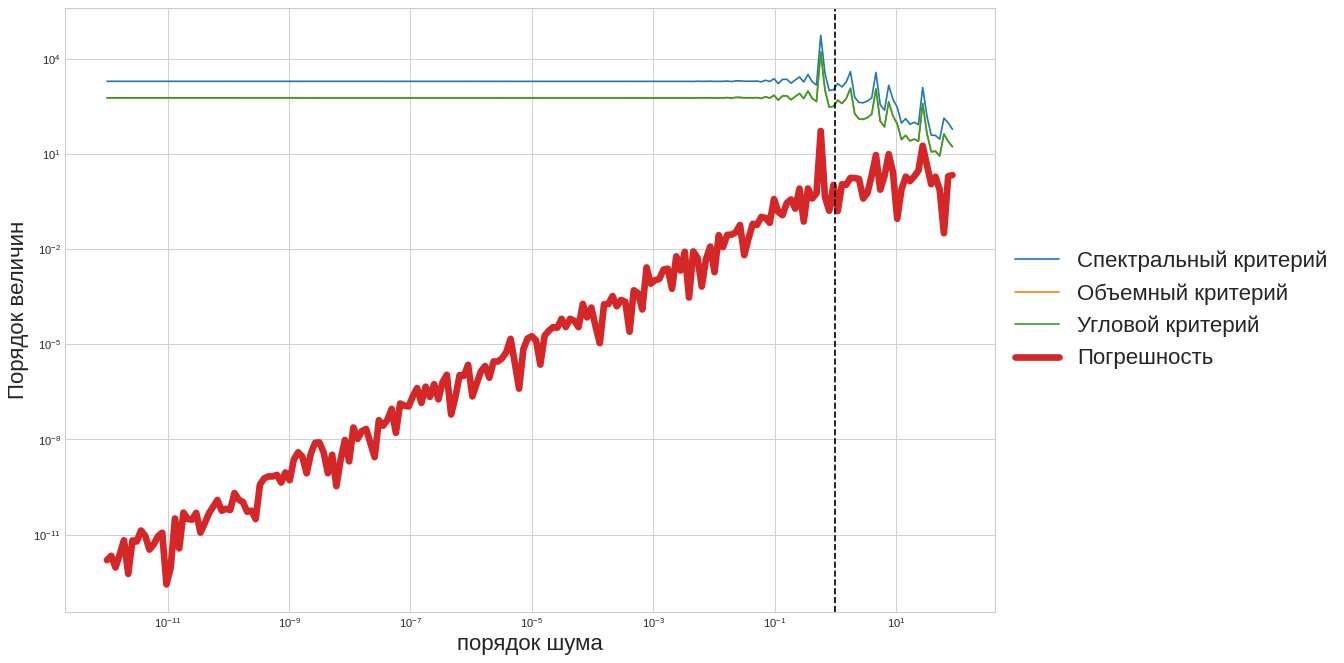

In [11]:
n = 2
x_0 = np.ones(n)
b = P_1 @ x_0
data = []
xs = np.logspace(-12, 2, 200, endpoint=False)

for order in xs:
    new_P = add_noise(P_1, order)
    new_b = np.array([add_noise(coord, order) for coord in b])
    new_x = np.linalg.solve(new_P, new_b)
    data.append((cond_s(new_P), cond_v(new_P), cond_a(new_P), norm(x_0 - new_x)))

plotter.ylog = True
plotter.xlog = True
plotter.xlabel = 'порядок шума'
plotter.ylabel = 'Порядок величин'
df = pd.DataFrame(data, columns=['cond_s', 'cond_v', 'cond_a', 'error'])
df['x'] = xs
plotter.plot(df)
plotter.ax.axvline(x=1, linestyle='dashed', color ='#000000')
pass


Рассмотрим вторую матрицу из методички

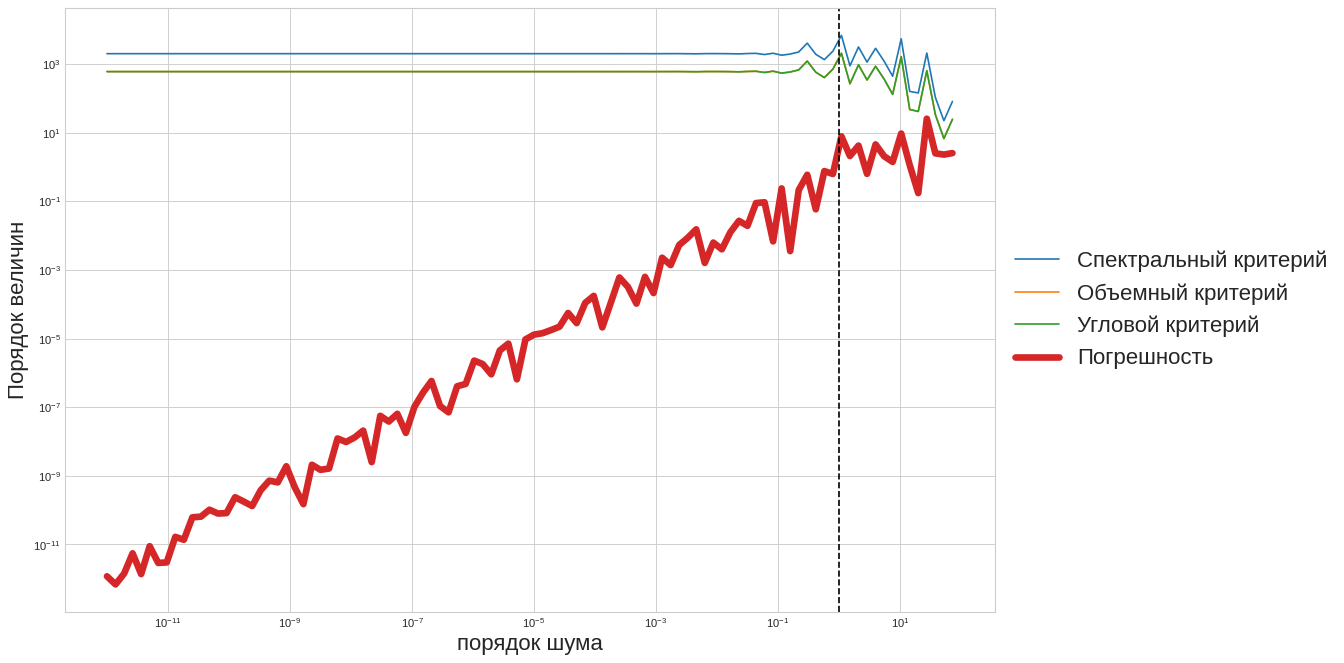

In [13]:
n = 2
x_0 = np.ones(n)
b = P_2 @ x_0
data = []
xs = np.logspace(-12, 2, 100, endpoint=False)

for order in xs:
    new_P = add_noise(P_2, order)
    new_b = np.array([add_noise(coord, order) for coord in b])
    new_x = np.linalg.solve(new_P, new_b)
    data.append((cond_s(new_P), cond_v(new_P), cond_a(new_P), norm(x_0 - new_x)))

plotter.ylog = True
plotter.xlog = True
plotter.xlabel = 'порядок шума'
plotter.ylabel = 'Порядок величин'
df = pd.DataFrame(data, columns=['cond_s', 'cond_v', 'cond_a', 'error'])
df['x'] = xs
plotter.plot(df)
plotter.ax.axvline(x=1, linestyle='dashed', color ='#000000')
pass


Возьмём трёхдиагональную матрицу

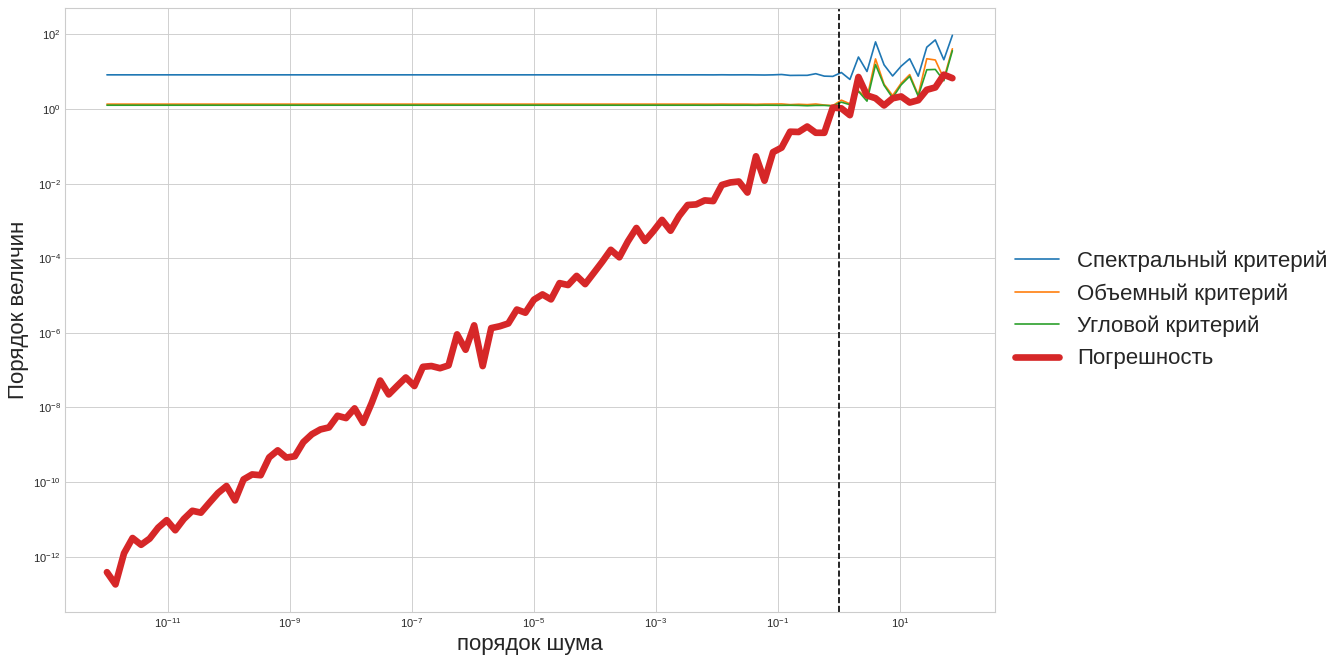

In [14]:
n = 4
x_0 = np.ones(n)
b = T @ x_0
data = []
xs = np.logspace(-12, 2, 100, endpoint=False)

for order in xs:
    new_T = add_noise(T, order)
    new_b = np.array([add_noise(coord, order) for coord in b])
    new_x = np.linalg.solve(new_T, new_b)
    data.append((cond_s(new_T), cond_v(new_T), cond_a(new_T), norm(x_0 - new_x)))

plotter.ylog = True
plotter.xlog = True
plotter.xlabel = 'порядок шума'
plotter.ylabel = 'Порядок величин'
df = pd.DataFrame(data, columns=['cond_s', 'cond_v', 'cond_a', 'error'])
df['x'] = xs
plotter.plot(df)
plotter.ax.axvline(x=1, linestyle='dashed', color ='#000000')
pass


Для трёхдиагональной матрицы наблюдается схожие изменения погрешности и чисел обусловленности

Вывод: при достаточно небольшом шуме не происходит увеличения чисел обусловленности с ростом погрешности, при этом для всех матриц числа обусловленности выступают в качестве верхней границы погрешности решения